# Асимптотика

Математический background: Линейная функция, квадратичная функция, логорифмическая функция, здравый смысл (или теория вероятности).


От чего зависит время работы программы?
- от задачи
- от языка
- от алгоритма
- от реализации
- от входных данных

Немного подробнее:
- от задачи: очевидно, что две разные задачи могут решаться разное время. Например, проигрывание видео и нахождение минимума из 2х чисел. 
- от языка: языки программирования разные. Одна и та же задача, решенная на разных языках, будет почти 100% работать разное время.
- от алгоритма. Пусть есть определенная задача и определенный язык. (Что такое алгоритм?) Есть два алгоритма, оба решают нашу задачу. Определить, какой лучше можно разными путями, но начинать стоит с оценк ассимптотики.
- от реализации. Об этом будет в самом конце.
- от входных данных. Возьмем самую простую задачу, сортировка списка чисел (Есть список чисел, нам нужно получить список, состоящий из тех же чисел, но стоящих в порядке возрастания). Интуитивно должно быть понятно, что чем больше чисел нужно отсортить, тем дольше будет работать алгоритм.

## Асимптотика
асимптотика функции -- это поведение функции при стремлении аргумента к бесконечности.

О нотация.

Линия. Квадрат. Константа.

Задачки, которые мы решали, принимали разные входные данные. Это могли быть фиксированное количество чисел (на вход подаются 2 числа), не фиксированное (дан список чисел).


### Пример 1
```python
A = int(input())
B = int(input())
if A > B:
    print(A)
else:
    print(B)
```

### Пример 2a
```python
N = int(input())
s = 0
for i in range(N + 1):
    s += i
print(s)
```

### Пример 2b
```python
N = int(input())
print(N * (N + 1) / 2)
```

### Пример 3
```python
N = int(input())
maximum = 0
for i in range(N):
    current = int(input())
    if current > maximum:
        maximum = current
print(current)
```

### Пример 4
```python
N = int(input())
s = 0
for i in range(N):
    for j in range(N):
        s += i * j
print(s)
```

### Пример 4
```python
N = int(input())
M = int(input())
s = 0
for i in range(N):
    for j in range(M):
        s += i * j
print(s)
```

### Пример 5
```python
N = int(input())
s = 0
for i in range(N):
    for j in range(i, N):
        s += i * j
print(s)
```

### Пример 6
```python
def S(n):
    if n < 1:
        return 0
    s = S(n - 1)
    return s + n

N = int(input())
s = S(N)
print(s)
```

## Сортировка
### Сортировка пузырьком

Описание:
Алгоритм состоит из повторяющихся проходов по сортируемому массиву. За каждый проход элементы последовательно сравниваются попарно и, если порядок в паре неверный, выполняется обмен элементов. Проходы по массиву повторяются N раз. При каждом проходе алгоритма по внутреннему циклу, очередной наибольший элемент массива ставится на своё место в конце массива рядом с предыдущим «наибольшим элементом», а наименьший элемент перемещается на одну позицию к началу массива («всплывает» до нужной позиции, как пузырёк в воде, отсюда и название алгоритма).

In [1]:
def bubble_sort(array):
    for i in range(len(array)):
        for j in range(1, len(array)):
            if array[j] < array[j - 1]:
                array[j], array[j - 1] = array[j - 1], array[j]

    return array

print(bubble_sort([1, 3, 4, 2, 6, 5, 5, 1, 2]))

[1, 1, 2, 2, 3, 4, 5, 5, 6]


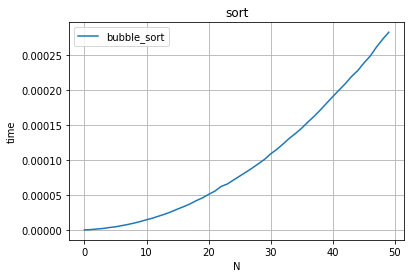

In [2]:
from utils.L003 import compare_functions_time
import random
%matplotlib inline


def data_generator(N):
    x = list(range(N))
    random.shuffle(x)
    return [x]

compare_functions_time(
    [bubble_sort],
    ['bubble_sort'],
    data_generator, 
    range(50),
    'sort', 'N', 'time', 200)
pass

In [3]:
def bubble_sort2(array):
    for i in range(len(array)):
        for j in range(1 + i, len(array) - i):
            if array[j] < array[j - 1]:
                array[j], array[j - 1] = array[j - 1], array[j]

    return array

print(bubble_sort([1, 3, 4, 2, 6, 5, 5, 1, 2]))

[1, 1, 2, 2, 3, 4, 5, 5, 6]


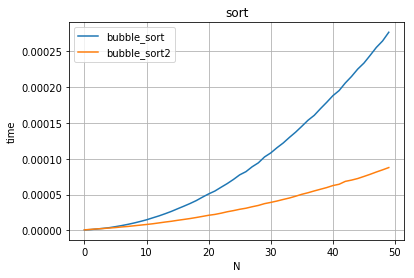

In [4]:
compare_functions_time(
    [bubble_sort, bubble_sort2],
    ['bubble_sort', 'bubble_sort2'],
    data_generator, 
    range(50),
    'sort', 'N', 'time', 200)
pass

In [5]:
def bubble_sort3(array):
    for i in range(len(array)):
        is_sorted = True
        for j in range(1 + i, len(array) - i):
            if array[j] < array[j - 1]:
                array[j], array[j - 1] = array[j - 1], array[j]
                is_sorted = False
        if is_sorted:
            break

    return array

print(bubble_sort([1, 3, 4, 2, 6, 5, 5, 1, 2]))

[1, 1, 2, 2, 3, 4, 5, 5, 6]


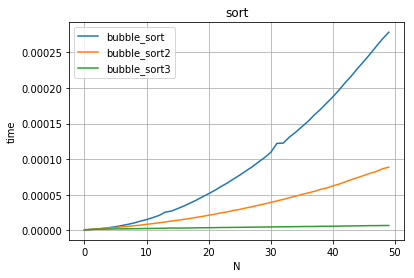

In [6]:
compare_functions_time(
    [bubble_sort, bubble_sort2, bubble_sort3],
    ['bubble_sort', 'bubble_sort2', 'bubble_sort3'],
    data_generator, 
    range(50),
    'sort', 'N', 'time', 200)
pass

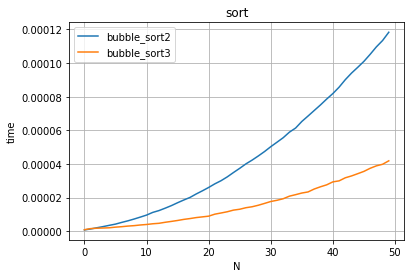

In [7]:
compare_functions_time(
    [bubble_sort2, bubble_sort3],
    ['bubble_sort2', 'bubble_sort3'],
    data_generator, 
    range(50),
    'sort', 'N', 'time', 400)
pass

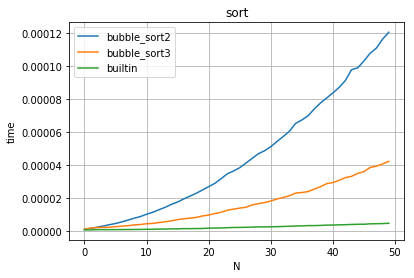

In [8]:
compare_functions_time(
    [bubble_sort2, bubble_sort3, list.sort],
    ['bubble_sort2', 'bubble_sort3', 'builtin'],
    data_generator, 
    range(50),
    'sort', 'N', 'time', 200)
pass

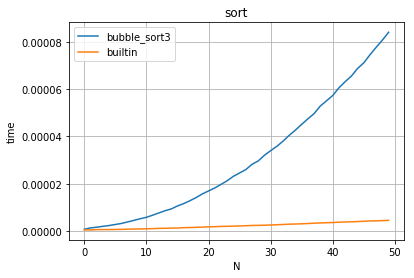

In [10]:
compare_functions_time(
    [bubble_sort3, list.sort],
    ['bubble_sort3', 'builtin'],
    data_generator, 
    range(50),
    'sort', 'N', 'time', 800)
pass

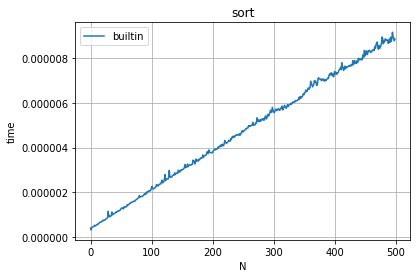

In [14]:
compare_functions_time(
    [list.sort],
    ['builtin'],
    data_generator, 
    range(500),
    'sort', 'N', 'time', 100)
pass